## Pytorch基础
### Variable(变量)
在`torch.autograd.Variable`里面，将`tensor`变成`Variable`只需要`Variable(a)`即可

In [4]:
from torch.autograd import Variable
import torch
x = Variable(torch.Tensor([1]),requires_grad=True)
w = Variable(torch.Tensor([2]),requires_grad=True)
b = Variable(torch.Tensor([3]),requires_grad=True)

y = w*x+b

y.backward()
print(x.grad)
print(w.grad)
print(b.grad)

tensor([2.])
tensor([1.])
tensor([1.])


In [8]:
#### 矩阵自动求梯度

x= torch.randn(3)
x = Variable(x,requires_grad=True)
y = x*2
print(y)
y.backward(torch.FloatTensor([1,0.1,0.01]))
print(x.grad)

## dataset
import torch.utils.data.dataset


tensor([0.7795, 3.6678, 2.1004], grad_fn=<MulBackward0>)
tensor([2.0000, 0.2000, 0.0200])


$$y=w^Tx_i+b$$
$$w^*=\argmin_w\left(y-Xw\right)^T \left(y-Xw\right)$$


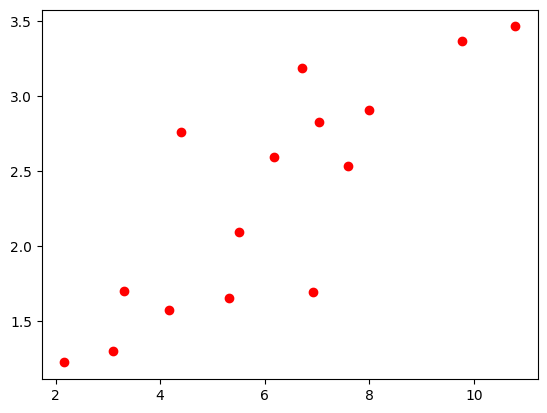

In [10]:
import numpy as np
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                    [9.779],[6.182],[7.59],[2.167],[7.042],
                    [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                    [3.366],[2.596],[2.53],[1.221],[2.827],
                    [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
import pylab as plt
plt.plot(x_train,y_train,'ro',label='origin data')

In [15]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                    [9.779],[6.182],[7.59],[2.167],[7.042],
                    [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                    [3.366],[2.596],[2.53],[1.221],[2.827],
                    [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.Linear = nn.Linear(1,1)
    
    def forward(self,x):
        out = self.Linear(x)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LinearRegression().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

num_epochs=1000
for epoch in range(num_epochs):
    input = x_train.to(device)
    target = y_train.to(device)
    out = model(input)
    loss = criterion(out,target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(epoch+1) % 20==0:
        print(f'Epoch[{epoch+1}/{num_epochs}],loss:{loss.item():.6f}')      


Epoch[20/1000],loss:0.537622
Epoch[40/1000],loss:0.532165
Epoch[60/1000],loss:0.528407
Epoch[80/1000],loss:0.524731
Epoch[100/1000],loss:0.521094
Epoch[120/1000],loss:0.517494
Epoch[140/1000],loss:0.513931
Epoch[160/1000],loss:0.510405
Epoch[180/1000],loss:0.506914
Epoch[200/1000],loss:0.503459
Epoch[220/1000],loss:0.500040
Epoch[240/1000],loss:0.496655
Epoch[260/1000],loss:0.493305
Epoch[280/1000],loss:0.489989
Epoch[300/1000],loss:0.486707
Epoch[320/1000],loss:0.483459
Epoch[340/1000],loss:0.480244
Epoch[360/1000],loss:0.477062
Epoch[380/1000],loss:0.473912
Epoch[400/1000],loss:0.470794
Epoch[420/1000],loss:0.467709
Epoch[440/1000],loss:0.464655
Epoch[460/1000],loss:0.461632
Epoch[480/1000],loss:0.458640
Epoch[500/1000],loss:0.455678
Epoch[520/1000],loss:0.452747
Epoch[540/1000],loss:0.449846
Epoch[560/1000],loss:0.446974
Epoch[580/1000],loss:0.444132
Epoch[600/1000],loss:0.441319
Epoch[620/1000],loss:0.438535
Epoch[640/1000],loss:0.435779
Epoch[660/1000],loss:0.433051
Epoch[680/1000

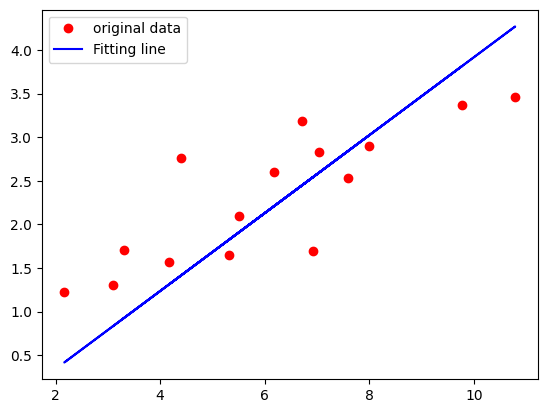

In [22]:
model.eval()
with torch.no_grad():
    predict = model(x_train).cpu().numpy()
plt.plot(x_train.cpu().numpy(),y_train.cpu().numpy(),'ro',label="original data")
plt.plot(x_train.cpu().numpy(),predict,'b-',label='Fitting line')
plt.legend()
plt.show()